In [1]:
#use "topfind"
#require "owl-top, owl-plplot, owl-jupyter, jupyter.notebook"
open Owl_plplot
open Owl_jupyter
open Owl

- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


/home/sckathach/.opam/default/lib/bigarray-compat: added to search path
/home/sckathach/.opam/default/lib/bigarray-compat/bigarray_compat.cma: loaded
/home/sckathach/.opam/default/lib/stdlib-shims: added to search path
/home/sckathach/.opam/default/lib/stdlib-shims/stdlib_shims.cma: loaded
/home/sckathach/.opam/default/lib/integers: added to search path
/home/sckathach/.opam/default/lib/integers/integers.cma: loaded
/home/sckathach/.opam/default/lib/ctypes: added to search path
/home/sckathach/.opam/default/lib/ctypes/ctypes.cma: loaded
/home/sckathach/.opam/default/lib/ocaml/str.cma: loaded
/home/sckathach/.opam/default/lib/ctypes/stubs: added to search path
/home/sckathach/.opam/default/lib/ctypes/stubs/ctypes_stubs.cma: loaded
/home/sckathach/.opam/default/lib/eigen/cpp: added to search path
/home/sckathach/.opam/default/lib/eigen/cpp/eigen_cpp_stubs.cma: loaded
/home/sckathach/.opam/default/lib/eigen: added to search path
/home/sckathach/.opam/default/lib/eigen/eigen.cma: loaded
/h

In [2]:
let x, y = Mat.meshgrid (-2.5) 2.5 (-2.5) 2.5 50 50

val x : Owl.Mat.mat =
  
      C0       C1       C2       C3       C4         C45     C46     C47     C48 C49 
 R0 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
 R1 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
 R2 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
 R3 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
 R4 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
     ...      ...      ...      ...      ... ...     ...     ...     ...     ... ... 
R45 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
R46 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
R47 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
R48 -2.5 -2.39796 -2.29592 -2.19388 -2.09184 ... 2.09184 2.19388 2.29592 2.39796 2.5 
R49 -2.5 -2.39796 -2.29592 -2

In [3]:
Mat.meshgrid (-2.) 2. (-4.) 4. 3 3

- : Owl.Mat.mat * Owl.Mat.mat =
(
   C0 C1 C2 
R0 -2  0  2 
R1 -2  0  2 
R2 -2  0  2 
,
 
   C0 C1 C2 
R0 -4 -4 -4 
R1  0  0  0 
R2  4  4  4 
)


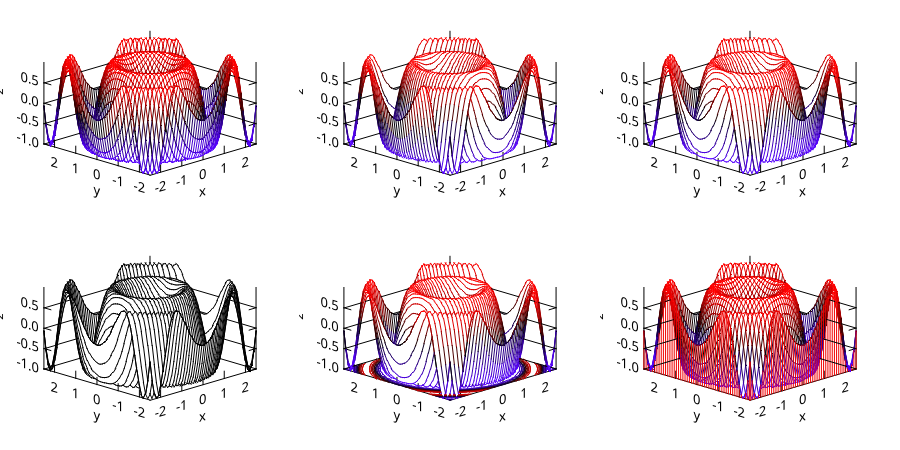

- : unit = ()


In [4]:
let z = Mat.(sin ((x * x) + (y * y))) in
  let h = Plot.create ~m:2 ~n:3 "plot_020.png" in

  Plot.subplot h 0 0;
  Plot.(mesh ~h ~spec:[ ZLine XY ] x y z);

  Plot.subplot h 0 1;
  Plot.(mesh ~h ~spec:[ ZLine X ] x y z);

  Plot.subplot h 0 2;
  Plot.(mesh ~h ~spec:[ ZLine Y ] x y z);

  Plot.subplot h 1 0;
  Plot.(mesh ~h ~spec:[ ZLine Y; NoMagColor ] x y z);

  Plot.subplot h 1 1;
  Plot.(mesh ~h ~spec:[ ZLine Y; Contour ] x y z);

  Plot.subplot h 1 2;
  Plot.(mesh ~h ~spec:[ ZLine XY; Curtain ] x y z);
  Plot.output h


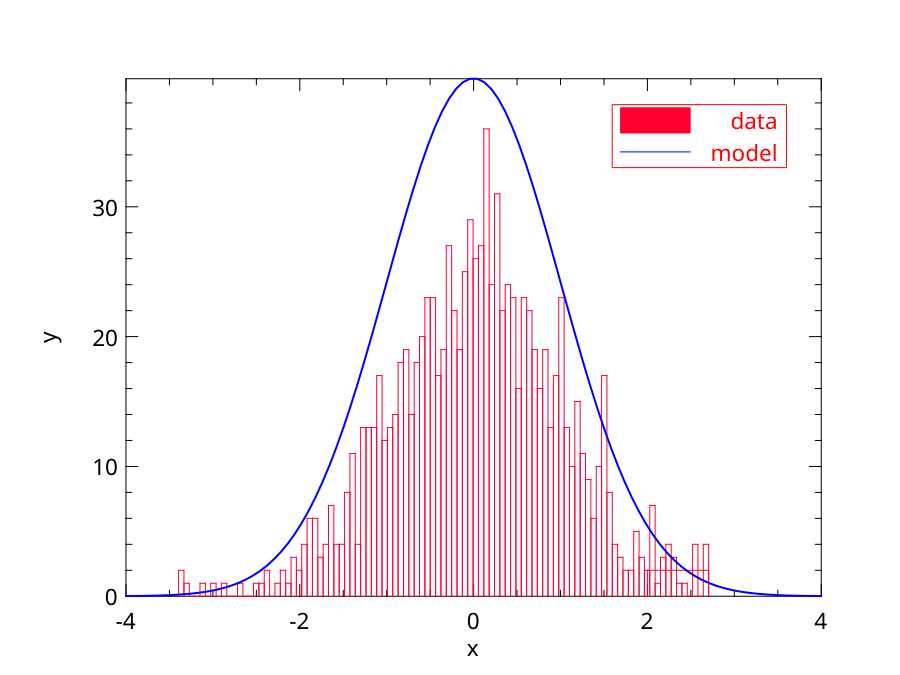

- : unit = ()


In [5]:
let g x = (Stats.gaussian_pdf x ~mu:0. ~sigma:1.) *. 100. in
  let y = Mat.gaussian ~mu:0. ~sigma:1. 1 1000 in

  (* plot multiple data sets *)
  let h = Plot.create "plot_025.png" in
  Plot.set_background_color h 255 255 255;
  Plot.(histogram ~h ~spec:[ RGB (255,0,50) ] ~bin:100 y);
  Plot.(plot_fun ~h ~spec:[ RGB (0,0,255); LineWidth 2. ] g (-4.) 4.);
  Plot.legend_on h [|"data"; "model"|];

  Plot.output h

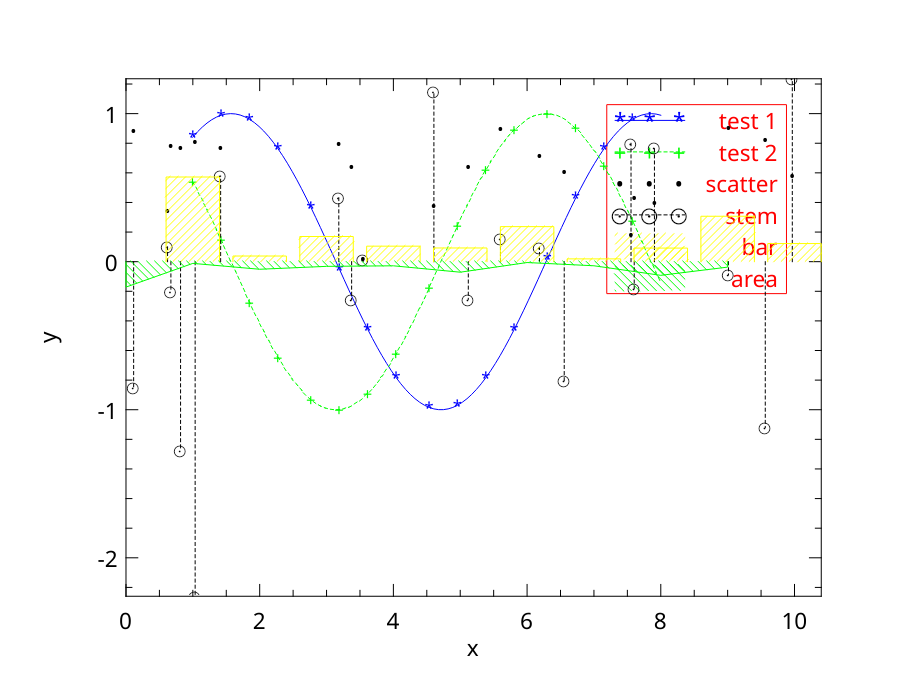

- : unit = ()


In [6]:
let x = Mat.(uniform 1 20 *$ 10.) in
  let y = Mat.(uniform 1 20) in
  let z = Mat.gaussian 1 20 in

  (* plot multiple data sets *)
  let h = Plot.create "plot_026.png" in
  Plot.(plot_fun ~h ~spec:[ RGB (0,0,255); LineStyle 1; Marker "*" ] Maths.sin 1. 8.);
  Plot.(plot_fun ~h ~spec:[ RGB (0,255,0); LineStyle 2; Marker "+" ] Maths.cos 1. 8.);
  Plot.scatter ~h x y;
  Plot.stem ~h x z;

  let u = Mat.(abs(gaussian 1 10 *$ 0.3)) in
  Plot.(bar ~h ~spec:[ RGB (255,255,0); FillPattern 3 ] u);

  let v = Mat.(neg u *$ 0.3) in
  let u = Mat.sequential 1 10 in
  Plot.(area ~h ~spec:[ RGB (0,255,0); FillPattern 4 ] u v);

  (* set up legend *)
  Plot.(legend_on h ~position:NorthEast [|"test 1"; "test 2"; "scatter"; "stem"; "bar"; "area"|]);
  Plot.output h